## Import, extraction et nettoyage des données

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from tqdm.notebook import tqdm, trange
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,normalize
from kmodes.kprototypes import KPrototypes
# import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


#Our own librabries
import sys
sys.path.insert(1, '../../Environnement/')
from utils import clean_data, add_Loss, regroupe_crop
import clean
import merge

In [2]:
from sklearn.ensemble import RandomForestClassifier


In [3]:
#Select the dataset of one season of one year
YEAR = 2019
SEASON = "Rabi" # or "Kharif" 

#Path to the dataset
pathData_R = f"..\..\Data\RawDataUnified\RawData_{YEAR}_Rabi"
pathData_K= f"..\..\Data\RawDataUnified\RawData_{YEAR}_Kharif"


df_R = pd.read_csv(pathData_R)
df_K=pd.read_csv(pathData_K)

In [4]:
#Clean an add loss to data
df_R=add_Loss(clean_data(df_R))
df_K=add_Loss(clean_data(df_K))

df_R.head()

,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Lp_2011,Lp_2012,Lp_2013,Lp_2014,Lp_2015,Lp_2016,Lp_2017,Loss
key,,,,,,,,,,,,
andhra pradesh_anantapur_vidapanakal___,Bengal Gram (Chana),179.859471,160.816527,30000.0,0.014822,0.0,0.0,0.000000,0.882341,0.645266,0.000000,1.078638e+05
andhra pradesh_anantapur_vajrakarur___,Bengal Gram (Chana),179.859471,160.816527,30000.0,0.000000,0.0,0.0,0.000000,0.217446,0.000000,0.347871,0.000000e+00
andhra pradesh_anantapur_gooty___,Bengal Gram (Chana),179.859471,160.816527,30000.0,0.330642,0.0,0.0,0.086273,0.000000,0.496653,0.122131,1.516659e+06
andhra pradesh_anantapur_guntakal___,Bengal Gram (Chana),179.859471,160.816527,30000.0,0.330642,0.0,0.0,0.086273,0.000000,0.496653,0.122131,1.516659e+06
andhra pradesh_anantapur_pamidi___,Bengal Gram (Chana),179.859471,160.816527,30000.0,0.330642,0.0,0.0,0.086273,0.000000,0.496653,0.122131,1.516659e+06


In [5]:
#data for Davis_Bouldin criteria and for clustering : sans normalisation
collumns_db = [f'Lp_{i}' for i in range(2011,2018)] # colonnes : que les lp
scale = StandardScaler()
data_R_db=pd.DataFrame(normalize(scale.fit_transform(df_R[collumns_db])))
data_K_db=pd.DataFrame(normalize(scale.fit_transform(df_K[collumns_db])))
data_R_db.head()

,0,1,2,3,4,5,6
0,-0.179927,-0.192594,-0.212738,-0.269584,0.782798,0.430042,-0.122031
1,-0.390026,-0.373301,-0.412345,-0.522530,0.074056,-0.287986,0.420761
2,0.483404,-0.339975,-0.375533,-0.322318,-0.362408,0.523886,-0.005252
3,0.483404,-0.339975,-0.375533,-0.322318,-0.362408,0.523886,-0.005252
4,0.483404,-0.339975,-0.375533,-0.322318,-0.362408,0.523886,-0.005252


## Clustering k-Means

Uniquement avec les pertes de production

In [9]:
score_R = []
for i in range(2,16) : 
    nb_clusters_R = i
    kmeans_R = KMeans(init="k-means++", n_clusters=nb_clusters_R, max_iter=500, random_state=45).fit(data_R_db)
    kmeans_labels_R = kmeans_R.labels_
    db_index = davies_bouldin_score(data_R_db, kmeans_labels_R)
    score_R.append(db_index)
    print(f"db index for Rabi with k = {nb_clusters_R} : ", db_index)

db index for Rabi with k = 2 :  1.1449840670484963
db index for Rabi with k = 3 :  0.8789463131715455
db index for Rabi with k = 4 :  1.2566712101868416
db index for Rabi with k = 5 :  1.2782729113839544
db index for Rabi with k = 6 :  1.379573183155804
db index for Rabi with k = 7 :  1.2816571762436146
db index for Rabi with k = 8 :  1.3040776072129343
db index for Rabi with k = 9 :  1.2796085515533915
db index for Rabi with k = 10 :  1.2737969396311546
db index for Rabi with k = 11 :  1.2576176911273944
db index for Rabi with k = 12 :  1.2278183969366767
db index for Rabi with k = 13 :  1.1983144566216297
db index for Rabi with k = 14 :  1.212174549912619
db index for Rabi with k = 15 :  1.2403679375261845


In [10]:
score_K = []
for i in range(2,16) : 
    nb_clusters_K = i
    kmeans_K = KMeans(init="k-means++", n_clusters=nb_clusters_K, max_iter=500, random_state=45).fit(data_K_db)
    kmeans_labels_K = kmeans_K.labels_
    db_index = davies_bouldin_score(data_K_db, kmeans_labels_K)
    score_K.append(db_index)
    print(f"db index for Kharif with k = {nb_clusters_K} : ", db_index)

db index for Kharif with k = 2 :  1.4655587671808596
db index for Kharif with k = 3 :  1.2857888734877883
db index for Kharif with k = 4 :  1.4850622060802277
db index for Kharif with k = 5 :  1.4254887469403474
db index for Kharif with k = 6 :  1.426480270730597
db index for Kharif with k = 7 :  1.3718302945675784
db index for Kharif with k = 8 :  1.3505520872125294
db index for Kharif with k = 9 :  1.3498275263769122
db index for Kharif with k = 10 :  1.333617605398617
db index for Kharif with k = 11 :  1.2951664133413117
db index for Kharif with k = 12 :  1.29875386261543
db index for Kharif with k = 13 :  1.2396080143365629
db index for Kharif with k = 14 :  1.297223138400382
db index for Kharif with k = 15 :  1.2660613064401403


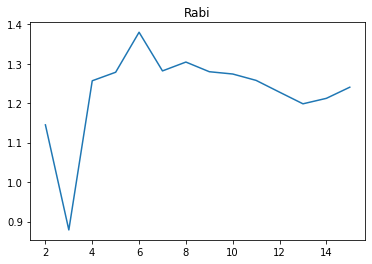

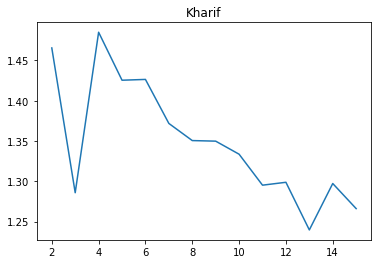

In [11]:
plt.plot(range(2,16),score_R)
plt.title("Rabi")
plt.show()

plt.plot(range(2,16),score_K)
plt.title("Kharif")
plt.show()

In [11]:
k_opt_R = 2
k_opt_K = 12

In [12]:
kmeans_R = KMeans(init="k-means++", n_clusters=k_opt_R, max_iter=500, random_state=45).fit(data_R_db)
kmeans_labels_R = kmeans_R.labels_

kmeans_K = KMeans(init="k-means++", n_clusters=k_opt_K, max_iter=500, random_state=45).fit(data_K_db)
kmeans_labels_K = kmeans_K.labels_

In [13]:
df_R["Cluster"] = kmeans_labels_R
df_K["Cluster"] = kmeans_labels_K

## Clustering GMM

In [12]:
from sklearn.mixture import GaussianMixture

In [28]:
score_R = []
for i in range(2,16) : 
    nb_clusters_R = i
    gm = GaussianMixture(n_components=nb_clusters_R,covariance_type = 'tied')
    preds = gm.fit_predict(data_R_db)
    db_index = davies_bouldin_score(data_R_db, preds)
    score_R.append(db_index)
    print(f"db index for Rabi with k = {nb_clusters_R} : ", db_index)


db index for Rabi with k = 2 :  1.170423425993565
db index for Rabi with k = 3 :  0.9712741700101887
db index for Rabi with k = 4 :  1.2825918451175
db index for Rabi with k = 5 :  1.4011168494832222
db index for Rabi with k = 6 :  1.2851486796891258
db index for Rabi with k = 7 :  1.2582011044126395
db index for Rabi with k = 8 :  1.2043883808937856
db index for Rabi with k = 9 :  1.470264884173924
db index for Rabi with k = 10 :  1.323899064022489
db index for Rabi with k = 11 :  1.1635550545296618
db index for Rabi with k = 12 :  1.2598247255862989
db index for Rabi with k = 13 :  1.2009512355183043
db index for Rabi with k = 14 :  1.172607126086574
db index for Rabi with k = 15 :  1.355006600366665


In [29]:
score_K = []
for i in range(2,16) : 
    nb_clusters_K = i
    gm = GaussianMixture(n_components=nb_clusters_K,covariance_type = 'tied')
    preds = gm.fit_predict(data_K_db)
    db_index = davies_bouldin_score(data_K_db, preds)
    score_K.append(db_index)
    print(f"db index for Rabi with k = {nb_clusters_K} : ", db_index)

db index for Rabi with k = 2 :  1.7335677233211604
db index for Rabi with k = 3 :  1.6722321797357047
db index for Rabi with k = 4 :  1.733114063399749
db index for Rabi with k = 5 :  1.5627112673483945
db index for Rabi with k = 6 :  1.4800374414290545
db index for Rabi with k = 7 :  1.4824938627807482
db index for Rabi with k = 8 :  1.4559234340335026
db index for Rabi with k = 9 :  1.4264216171060387
db index for Rabi with k = 10 :  1.3993056258095917
db index for Rabi with k = 11 :  1.25057806800137
db index for Rabi with k = 12 :  1.3753022434930904
db index for Rabi with k = 13 :  1.3880219466220802
db index for Rabi with k = 14 :  1.5088268402667298


KeyboardInterrupt: 

In [ ]:
plt.plot(range(2,16),score_R)
plt.title("Rabi")
plt.show()

plt.plot(range(2,16),score_K)
plt.title("Kharif")
plt.show()

array([0, 2, 1, ..., 2, 2, 2], dtype=int64)

## Analyse des clusters

## Valeurs moyennes par cluster

Rabi


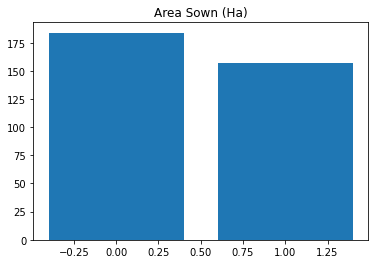

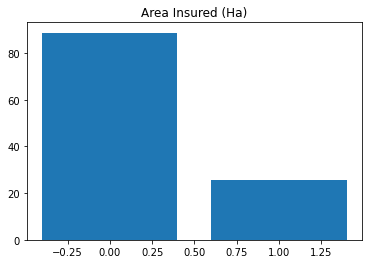

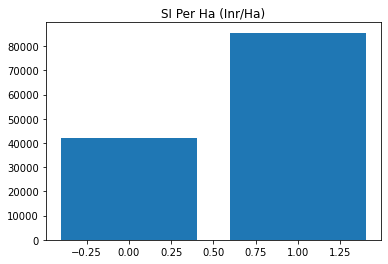

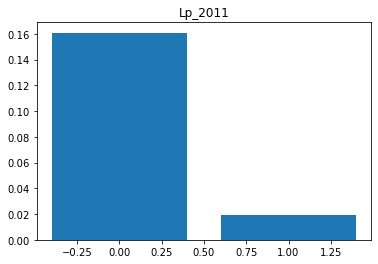

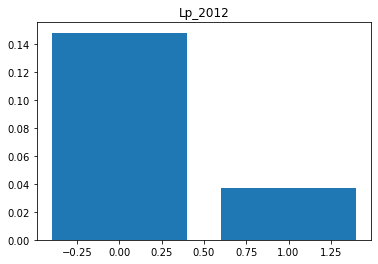

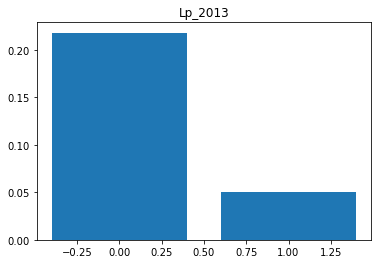

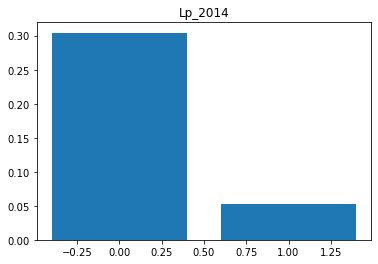

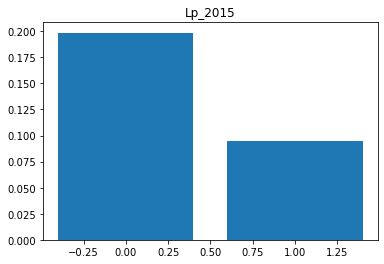

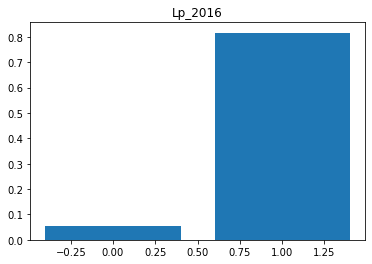

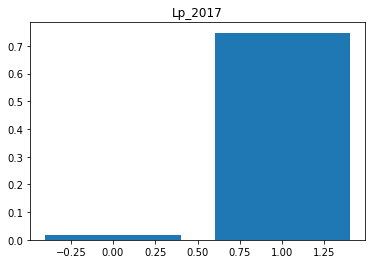

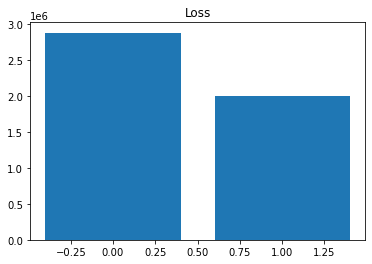

In [25]:
print("Rabi")
for col in df_R.columns:
    if col=='Crop' or col == 'Cluster':
        continue
    moys = [df_R[df_R['Cluster']==i][col].mean() for i in range(k_opt_R)]
    plt.bar(range(k_opt_R),moys)
    plt.title(col)
    plt.show()

Kharif


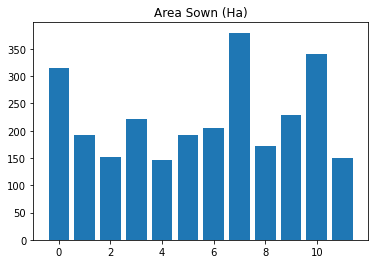

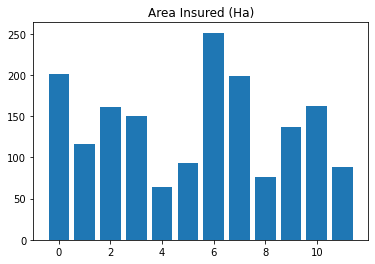

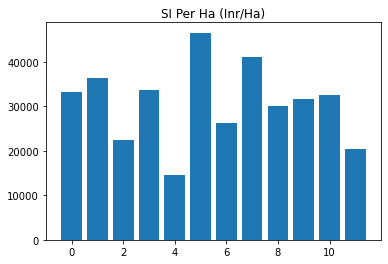

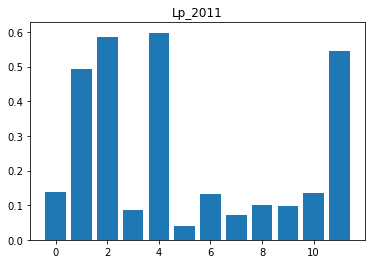

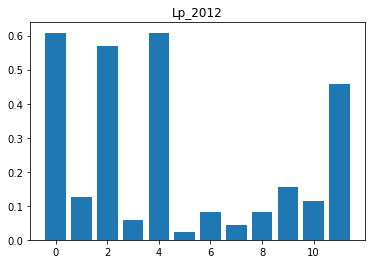

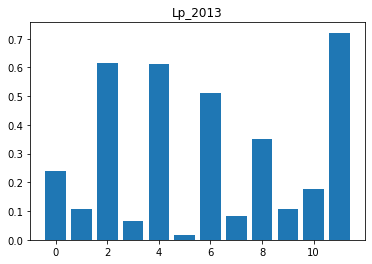

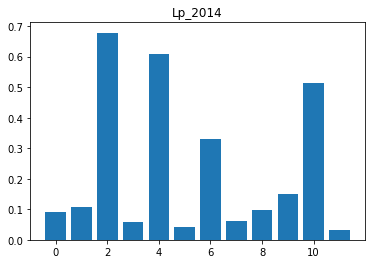

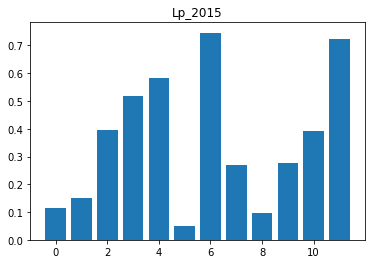

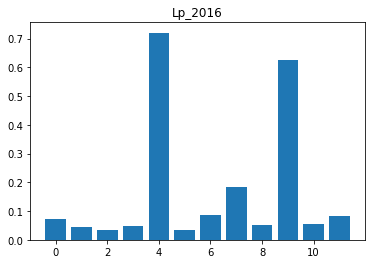

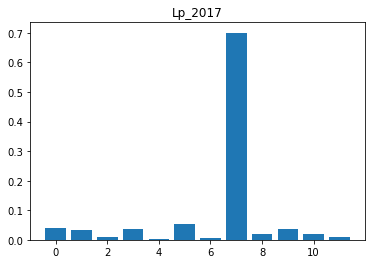

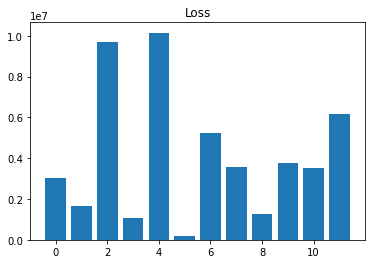

In [26]:
print("Kharif")
for col in df_R.columns:
    if col=='Crop' or col == 'Cluster':
        continue
    moys = [df_K[df_K['Cluster']==i][col].mean() for i in range(k_opt_K)]
    plt.bar(range(k_opt_K),moys)
    plt.title(col)
    plt.show()

## Approche centroïdes

In [17]:
kmeans_R.cluster_centers_

array([[0.16081883, 0.14801039, 0.2181625 , 0.30430438, 0.19863171,
        0.05348202, 0.01783587],
       [0.0195961 , 0.03701055, 0.05007659, 0.0530685 , 0.09457995,
        0.81641709, 0.74771645]])

## Approche arbre de décision

In [17]:
pd.unique(df_R["Crop"])[16][:-7]

'Wheat'

In [14]:
#Regroupement des Crop
crop_to_merge = {}
crops = pd.unique(df_R["Crop"])
for crop in crops:
    if crop[:-4] in crops:
        crop_to_merge[crop] = crop[:-4]
    elif crop[:-7] in crops:
        crop_to_merge[crop] = crop[:-7] 
    else:
        crop_to_merge[crop] = crop
crop_to_merge['Ragi IRR'] = "Ragi Un-IRR"
crop_to_merge['ONION IRR'] = 'Onion'
crop_to_merge

{'Bengal Gram (Chana)': 'Bengal Gram (Chana)',
 'Chilli': 'Chilli',
 'Groundnut': 'Groundnut',
 'Jowar': 'Jowar',
 'Maize': 'Maize',
 'Moong': 'Moong',
 'Onion': 'Onion',
 'Paddy': 'Paddy',
 'Sunflower': 'Sunflower',
 'Urad': 'Urad',
 'Red Chilli': 'Red Chilli',
 'Castor': 'Castor',
 'Lac': 'Lac',
 'Mustard': 'Mustard',
 'Potato': 'Potato',
 'Wheat IRR': 'Wheat',
 'Wheat Un-IRR': 'Wheat',
 'Isabgol': 'Isabgol',
 'Saunf': 'Saunf',
 'Jeera': 'Jeera',
 'Bajra': 'Bajra',
 'Garlic': 'Garlic',
 'Barley': 'Barley',
 'Wheat': 'Wheat',
 'Paddy IRR': 'Paddy',
 'Bengal Gram (Chana) IRR': 'Bengal Gram (Chana)',
 'Bengal Gram (Chana) Un-IRR': 'Bengal Gram (Chana)',
 'Urad Un-IRR': 'Urad',
 'Moong Un-IRR': 'Moong',
 'Groundnut Un-IRR': 'Groundnut',
 'Moth Un-IRR': 'Moth Un-IRR',
 'Jowar IRR': 'Jowar',
 'Jowar Un-IRR': 'Jowar',
 'Linseed Un-IRR': 'Linseed',
 'Maize IRR': 'Maize',
 'Maize Un-IRR': 'Maize',
 'ONION IRR': 'Onion',
 'Potato IRR': 'Potato',
 'Ragi IRR': 'Ragi Un-IRR',
 'Ragi Un-IRR': 'Rag

### Rabi

In [15]:
df_R_crop_merged = df_R.copy(deep=True)
df_R_crop_merged["Crop"] = df_R_crop_merged["Crop"].map(crop_to_merge)
df_R_crop_merged["Crop"]

key
andhra pradesh_anantapur_vidapanakal___        Bengal Gram (Chana)
andhra pradesh_anantapur_vajrakarur___         Bengal Gram (Chana)
andhra pradesh_anantapur_gooty___              Bengal Gram (Chana)
andhra pradesh_anantapur_guntakal___           Bengal Gram (Chana)
andhra pradesh_anantapur_pamidi___             Bengal Gram (Chana)
                                                      ...         
west bengal_howrah_uluberia-ii___                            Wheat
west bengal_purba medinipur_haldia___                        Wheat
west bengal_purba medinipur_mohisadal-ii___                  Wheat
west bengal_paschim medinipur____                            Maize
west bengal_birbhum____                                  Groundnut
Name: Crop, Length: 317503, dtype: object

In [16]:
X_R = pd.get_dummies(df_R_crop_merged[df_R_crop_merged.columns[:-9]])
forests = []
for i in range(k_opt_R):
    y_R = df_R_crop_merged['Cluster'] == i
    forests.append(RandomForestClassifier(random_state=0).fit(X_R,y_R))

In [17]:
list_forest_importances = [pd.Series(forests[i].feature_importances_, index=X_R.columns) for i in range(k_opt_R)]

In [18]:
print(list_forest_importances[0].sort_values(ascending=False)[:20])

Crop_Potato                 0.480023
SI Per Ha (Inr/Ha)          0.307910
Area Insured (Ha)           0.061651
Crop_Paddy II               0.042137
Crop_Wheat                  0.023512
Area Sown (Ha)              0.016403
Crop_Paddy                  0.012347
Crop_Bengal Gram (Chana)    0.010033
Crop_Mustard                0.009950
Crop_Pea                    0.009238
Crop_Lentil (Masoor)        0.007879
Crop_Boro Paddy             0.006071
Crop_Onion                  0.005010
Crop_Sugarcane              0.003081
Crop_Maize                  0.001151
Crop_Groundnut              0.000894
Crop_Garlic                 0.000890
Crop_Chilli                 0.000557
Crop_Jowar                  0.000423
Crop_Moth Un-IRR            0.000200
dtype: float64


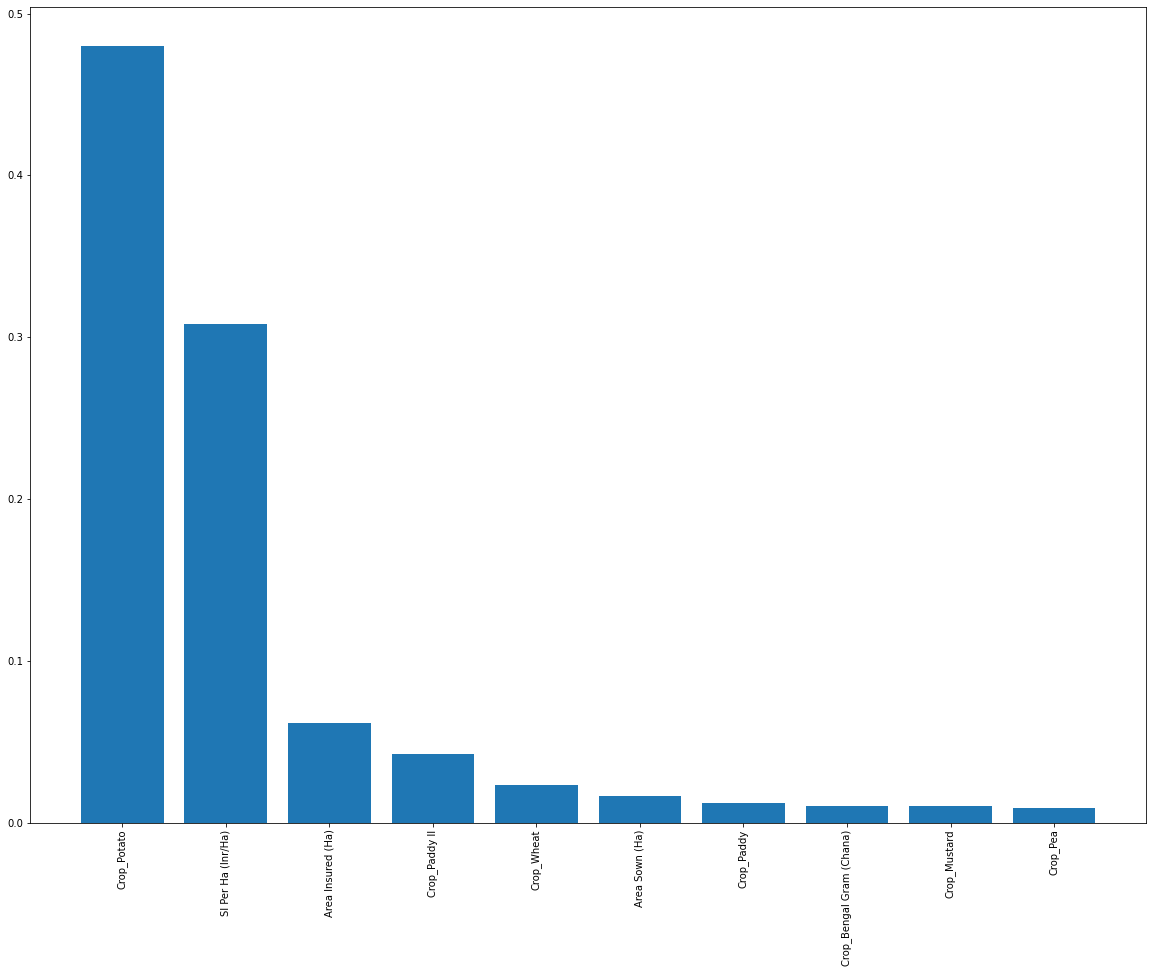

In [19]:
#importance and labels sorted decreasing
imp = np.sort(list_forest_importances[0])[::-1]
label_imp = X_R.columns[np.argsort(list_forest_importances[0])[::-1]]
p = 10 # number of parameters to plot

fig = plt.figure(figsize=(20,15))
plt.bar(label_imp[:p],imp[:p])
plt.xticks(rotation = 'vertical')
plt.show()

### Kharif

In [20]:
df_K_crop_merged = df_K.copy(deep=True)
df_K_crop_merged["Crop"] = df_K_crop_merged["Crop"].map(crop_to_merge)
df_K_crop_merged["Crop"]

key
andhra pradesh_anantapur_agali__agali                  NaN
andhra pradesh_anantapur_agali__akkagaladevarahalli    NaN
andhra pradesh_anantapur_agali__hulikeradevarahalli    NaN
andhra pradesh_anantapur_agali__inagalore              NaN
andhra pradesh_anantapur_agali__kodihalli              NaN
                                                      ... 
west bengal_uttar dinajpur__hemtabad__                 NaN
west bengal_uttar dinajpur__itahar__                   NaN
west bengal_uttar dinajpur__kaliaganj__                NaN
west bengal_uttar dinajpur__karandighi__               NaN
west bengal_uttar dinajpur__raiganj__                  NaN
Name: Crop, Length: 372909, dtype: object

In [21]:
X_K = pd.get_dummies(df_K_crop_merged[df_K_crop_merged.columns[:-9]])
forests = []
for i in range(k_opt_K):
    y_K = df_K_crop_merged['Cluster'] == i
    forests.append(RandomForestClassifier(random_state=0).fit(X_K,y_K))

In [22]:
list_forest_importances = [pd.Series(forests[i].feature_importances_, index=X_K.columns) for i in range(k_opt_K)]

In [23]:
print(list_forest_importances[0].sort_values(ascending=False)[:20])

Area Insured (Ha)       0.406152
SI Per Ha (Inr/Ha)      0.352680
Area Sown (Ha)          0.166114
Crop_Urad               0.022139
Crop_Moong              0.018103
Crop_Groundnut          0.007756
Crop_Bajra              0.006013
Crop_Maize              0.005882
Crop_Paddy              0.004669
Crop_Jowar              0.004486
Crop_Til (Sesame)       0.003417
Crop_Sunflower          0.001577
Crop_Castor             0.000542
Crop_Ragi Un-IRR        0.000173
Crop_Onion              0.000140
Crop_Moth Un-IRR        0.000090
Crop_Lentil (Masoor)    0.000030
Crop_Potato             0.000023
Crop_Tomato             0.000013
dtype: float64


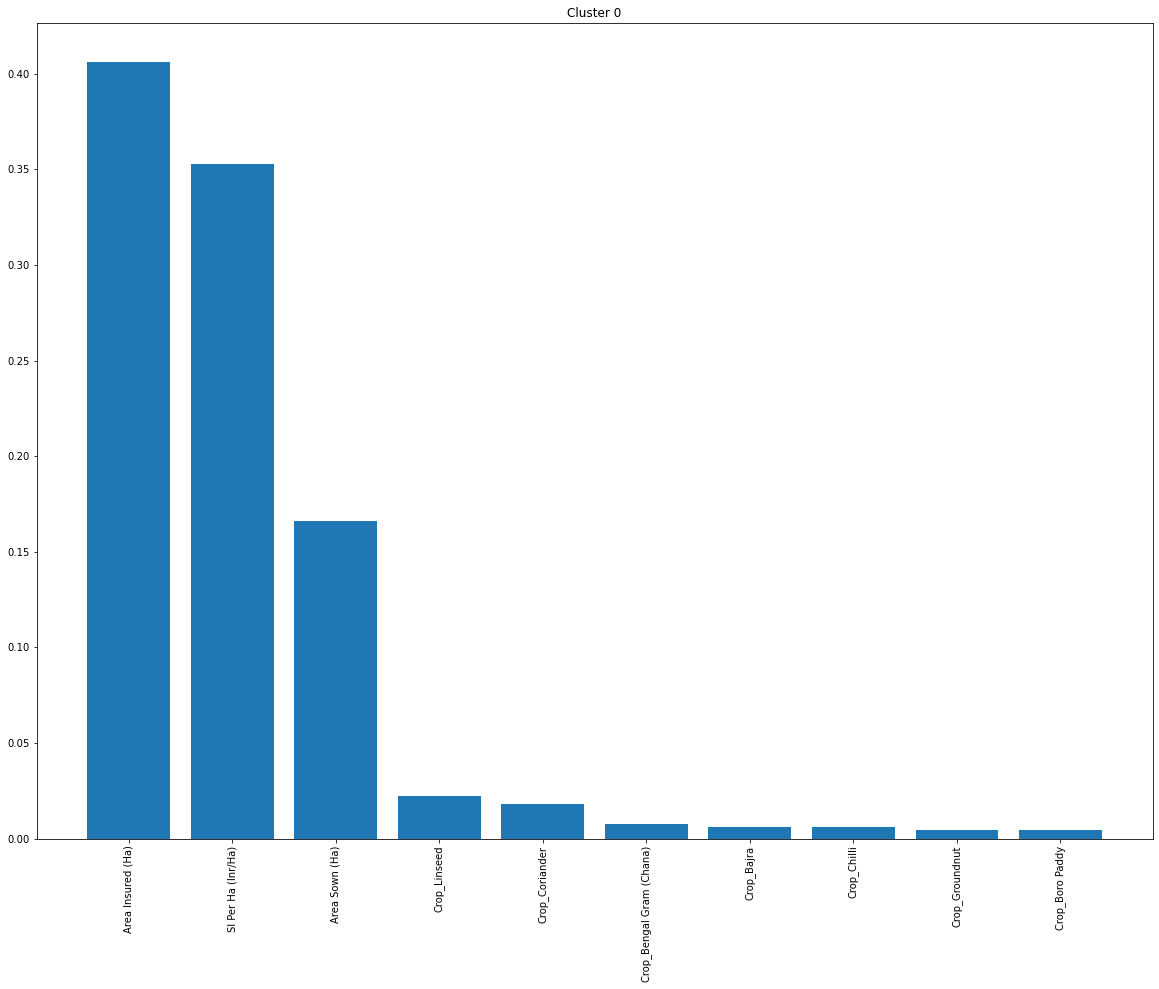

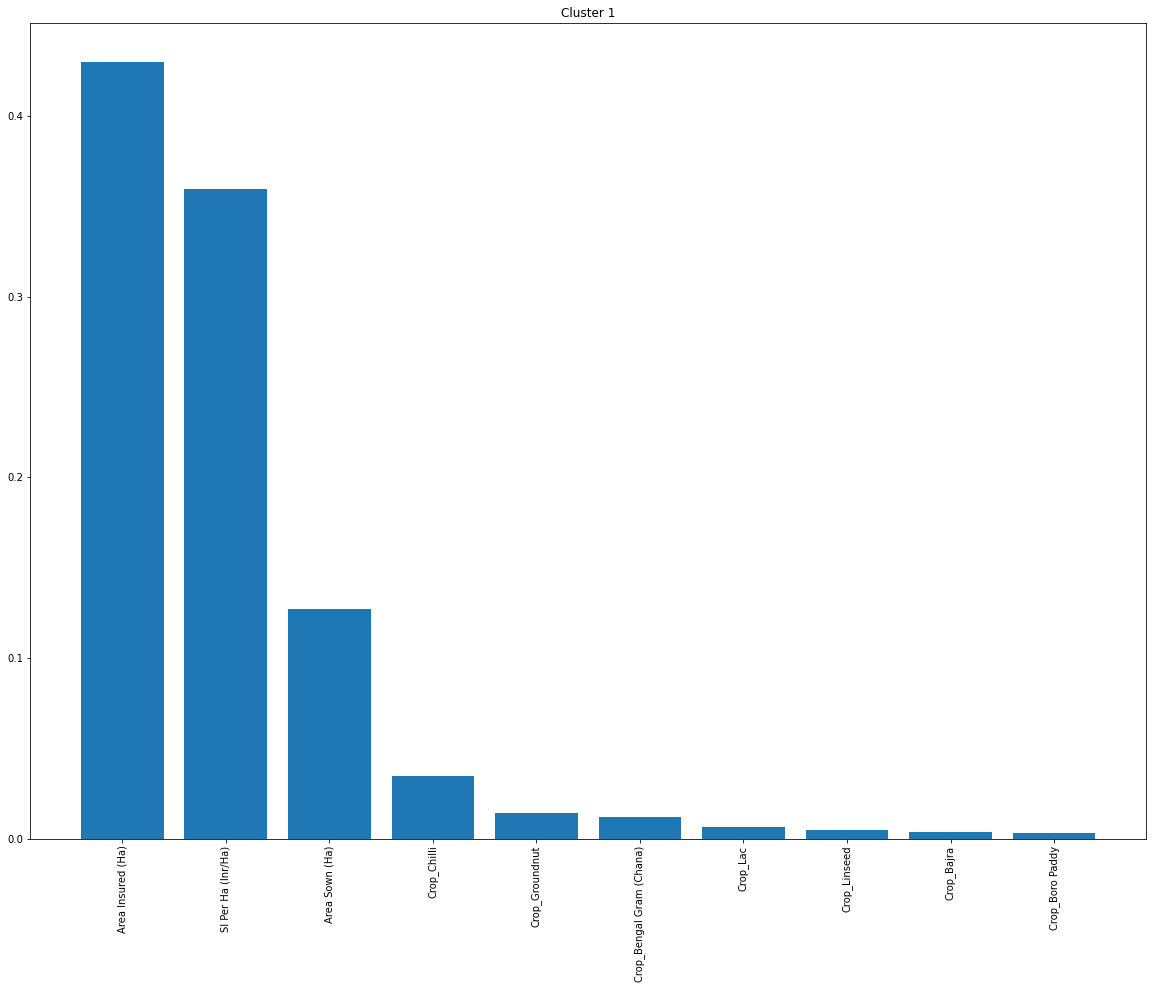

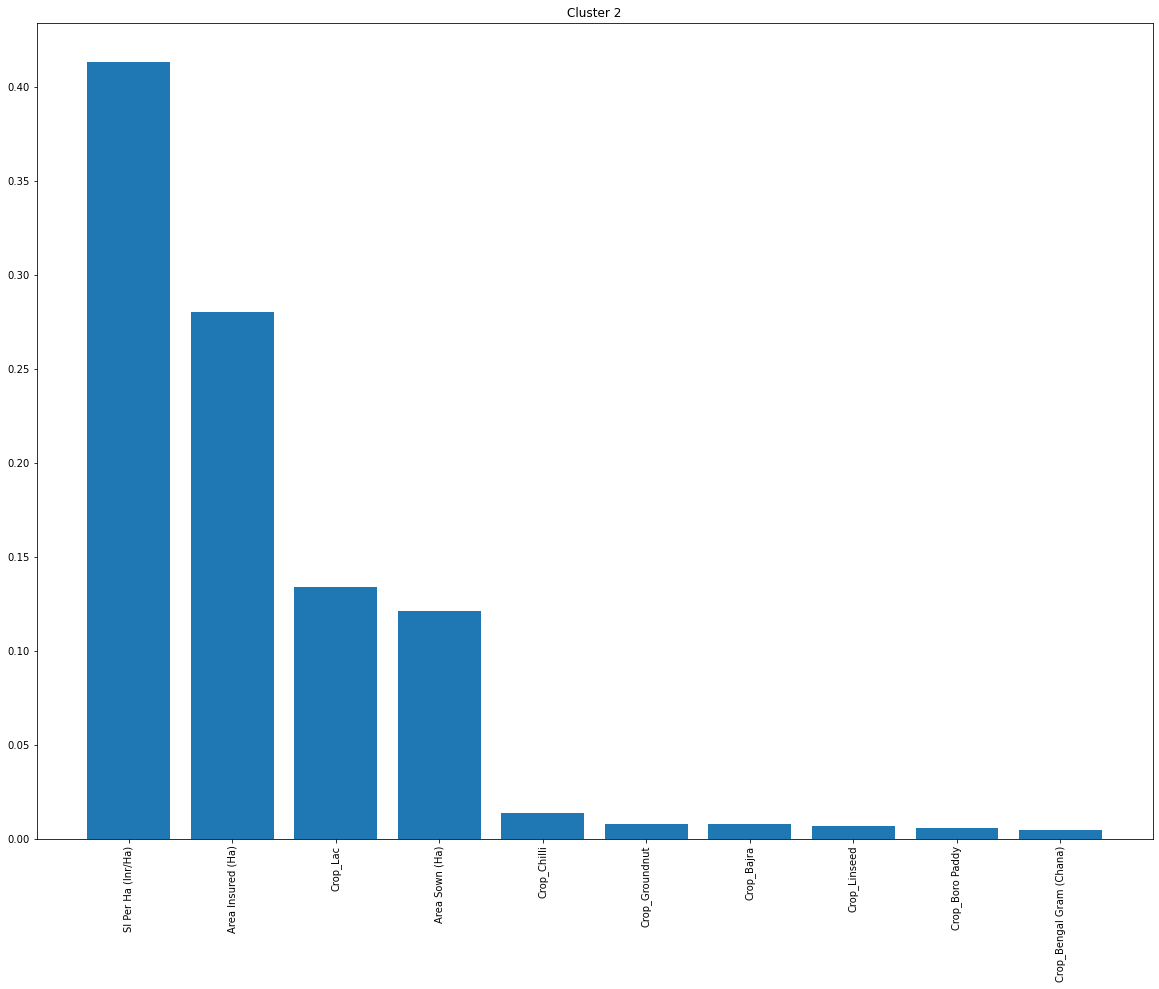

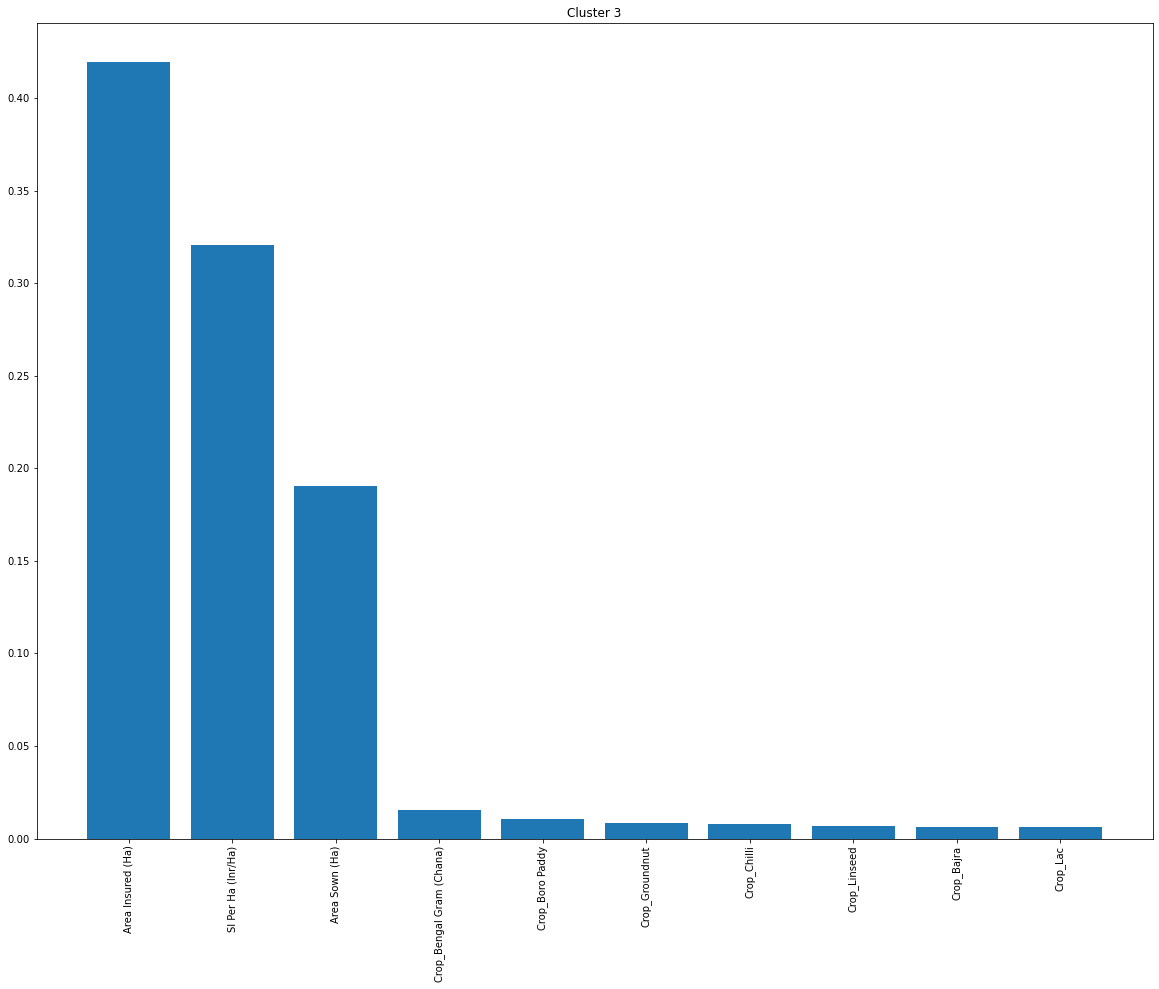

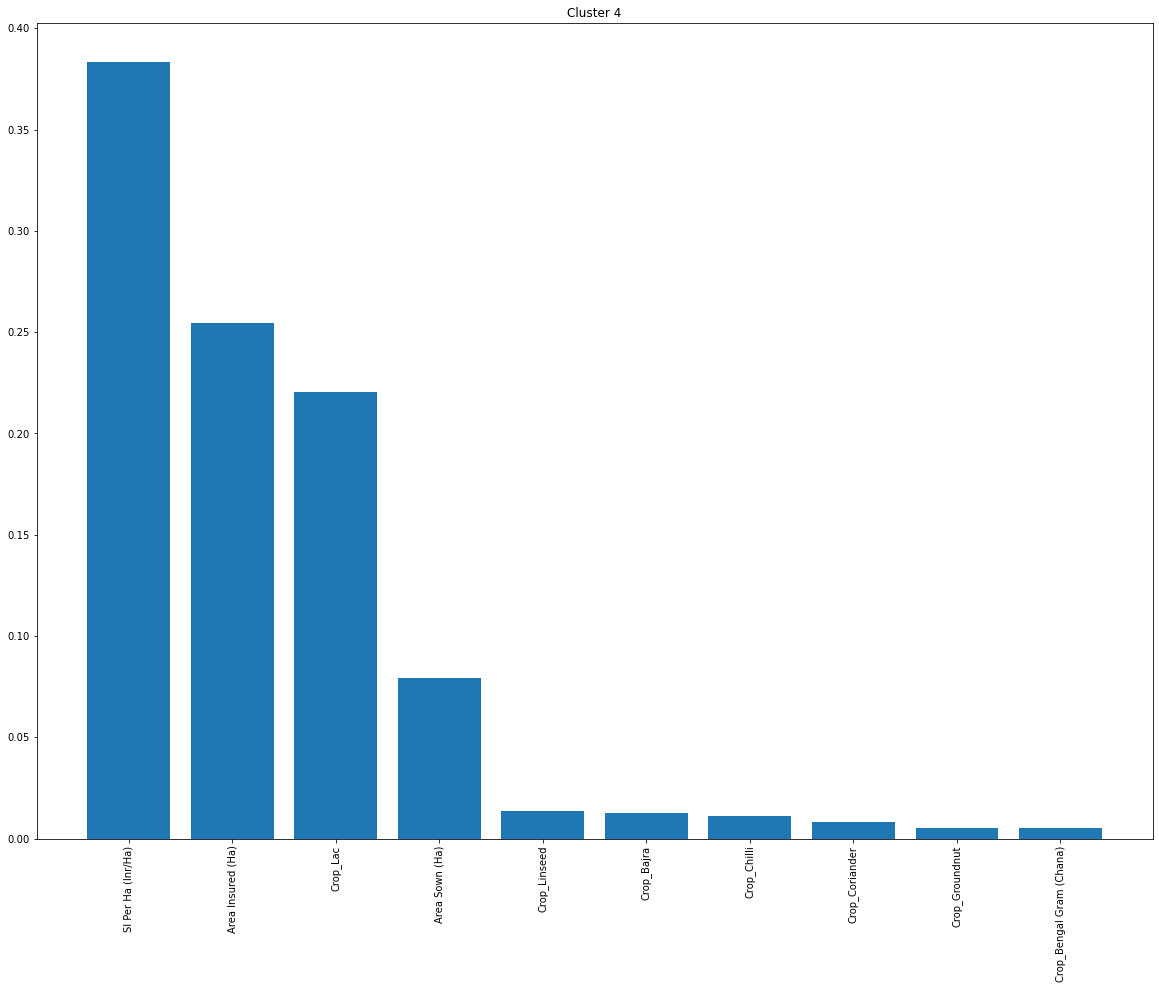

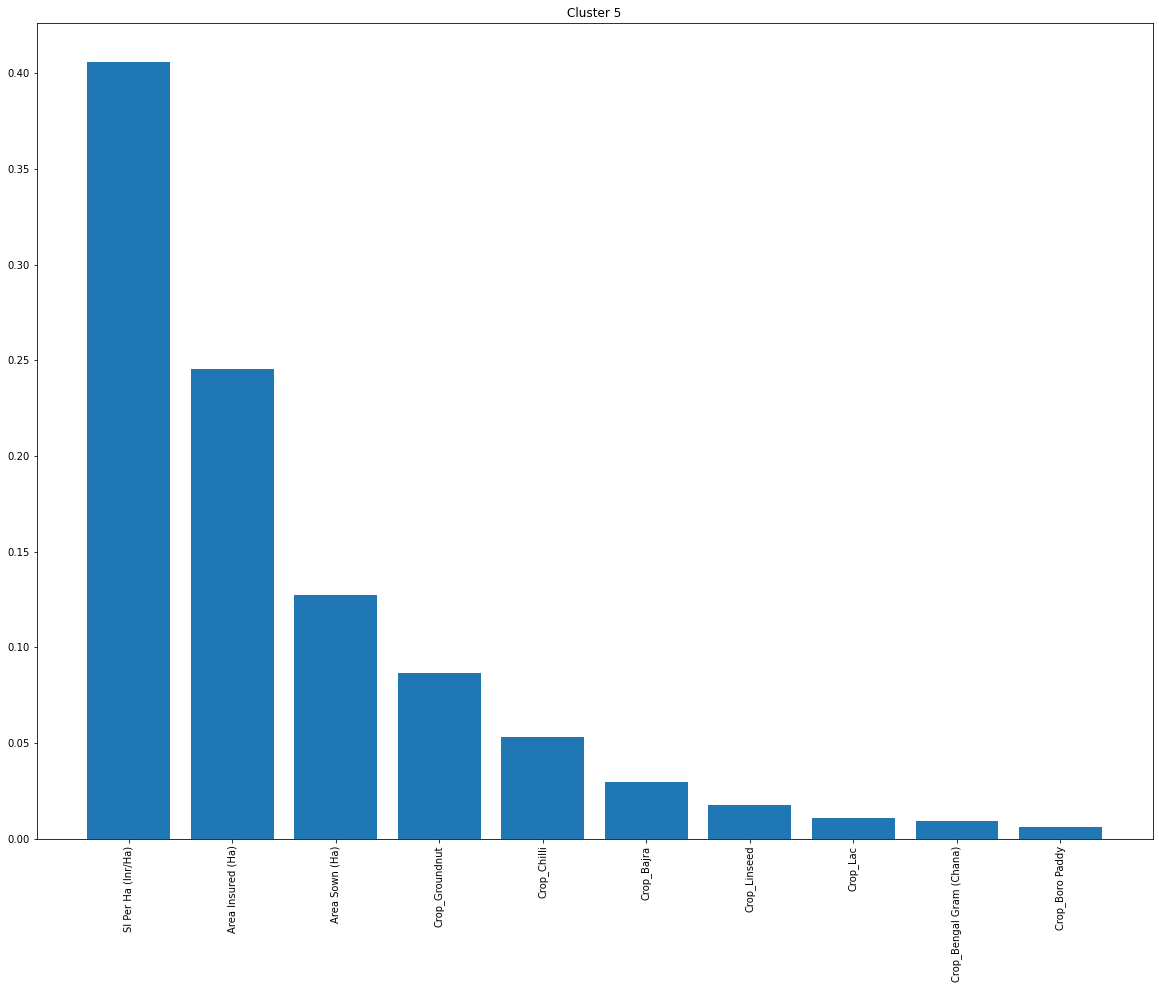

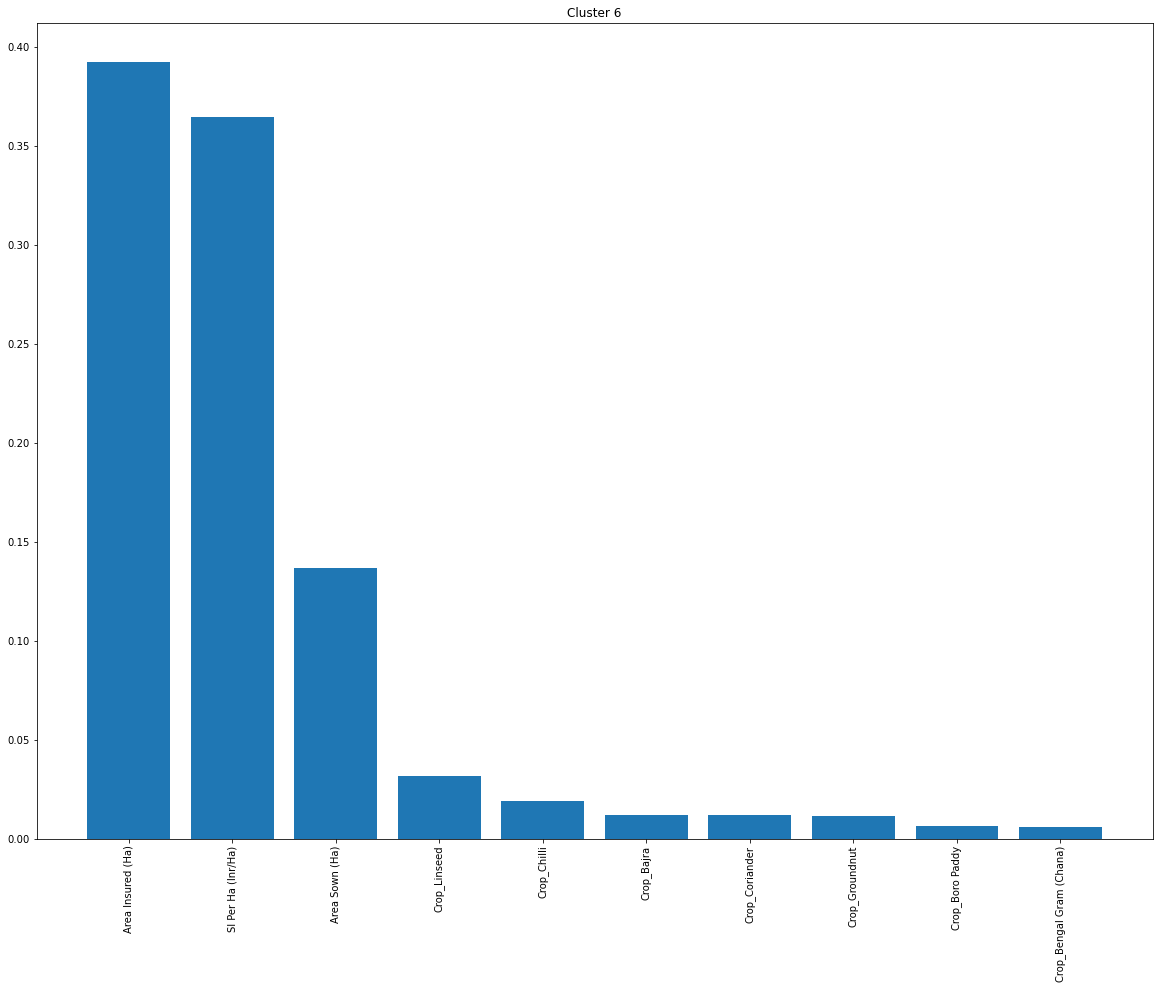

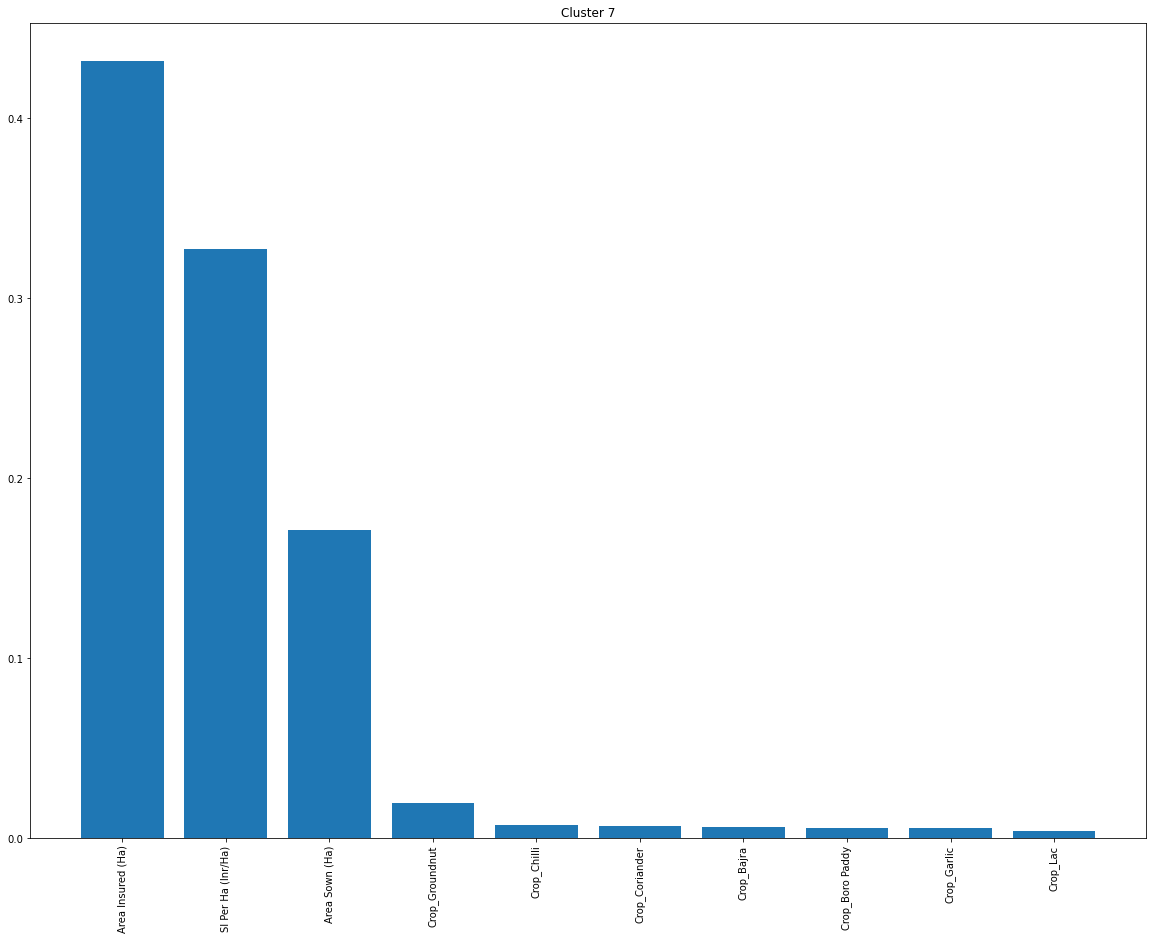

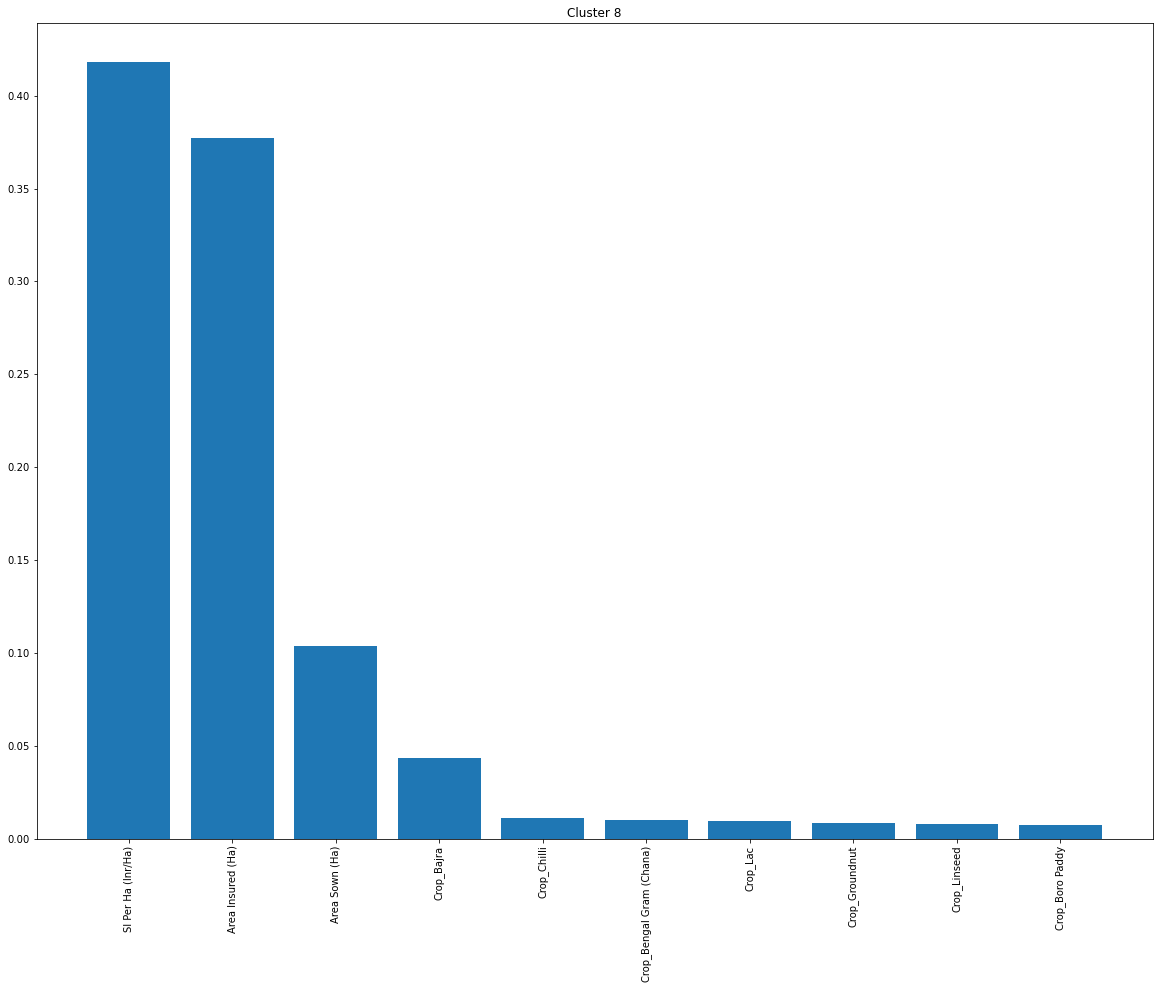

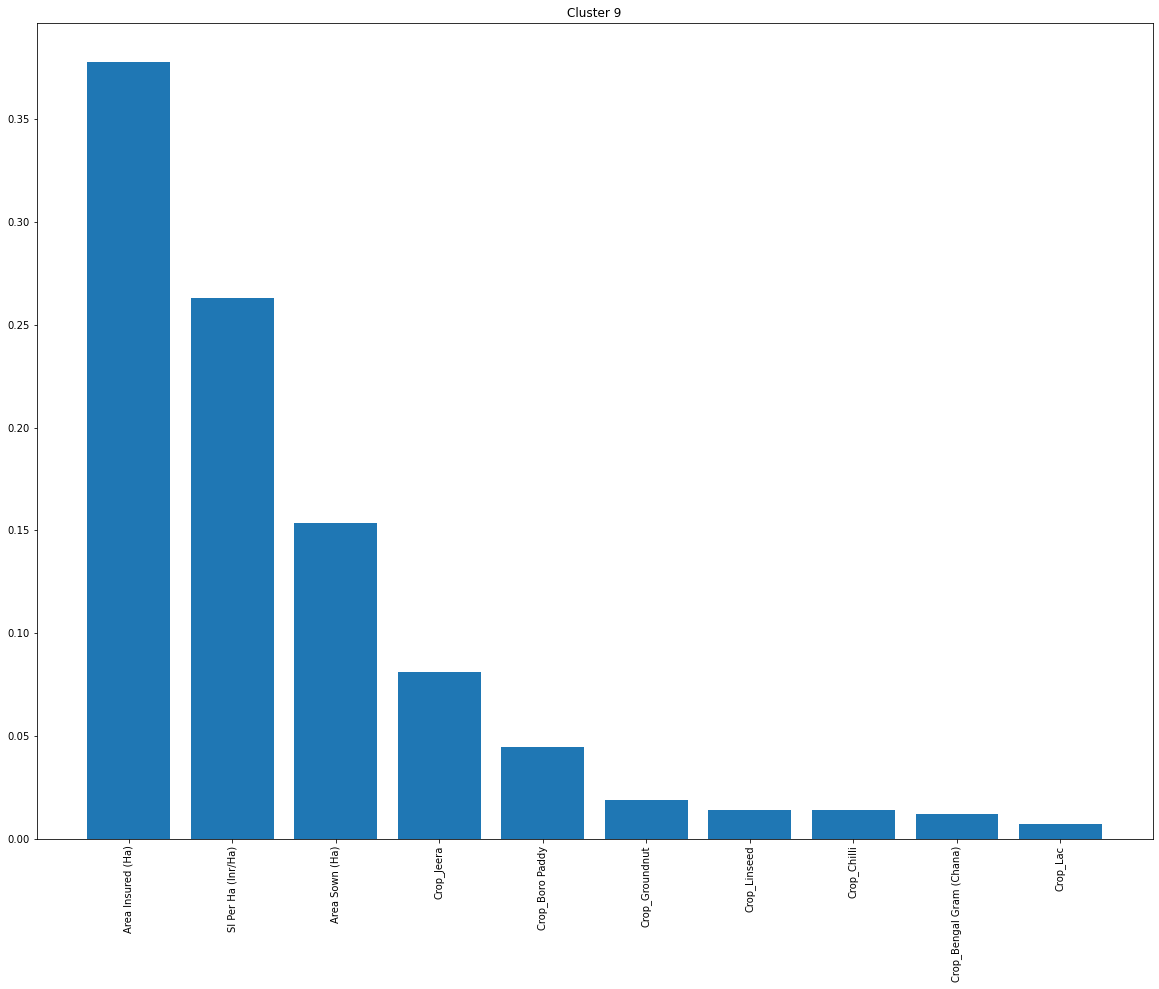

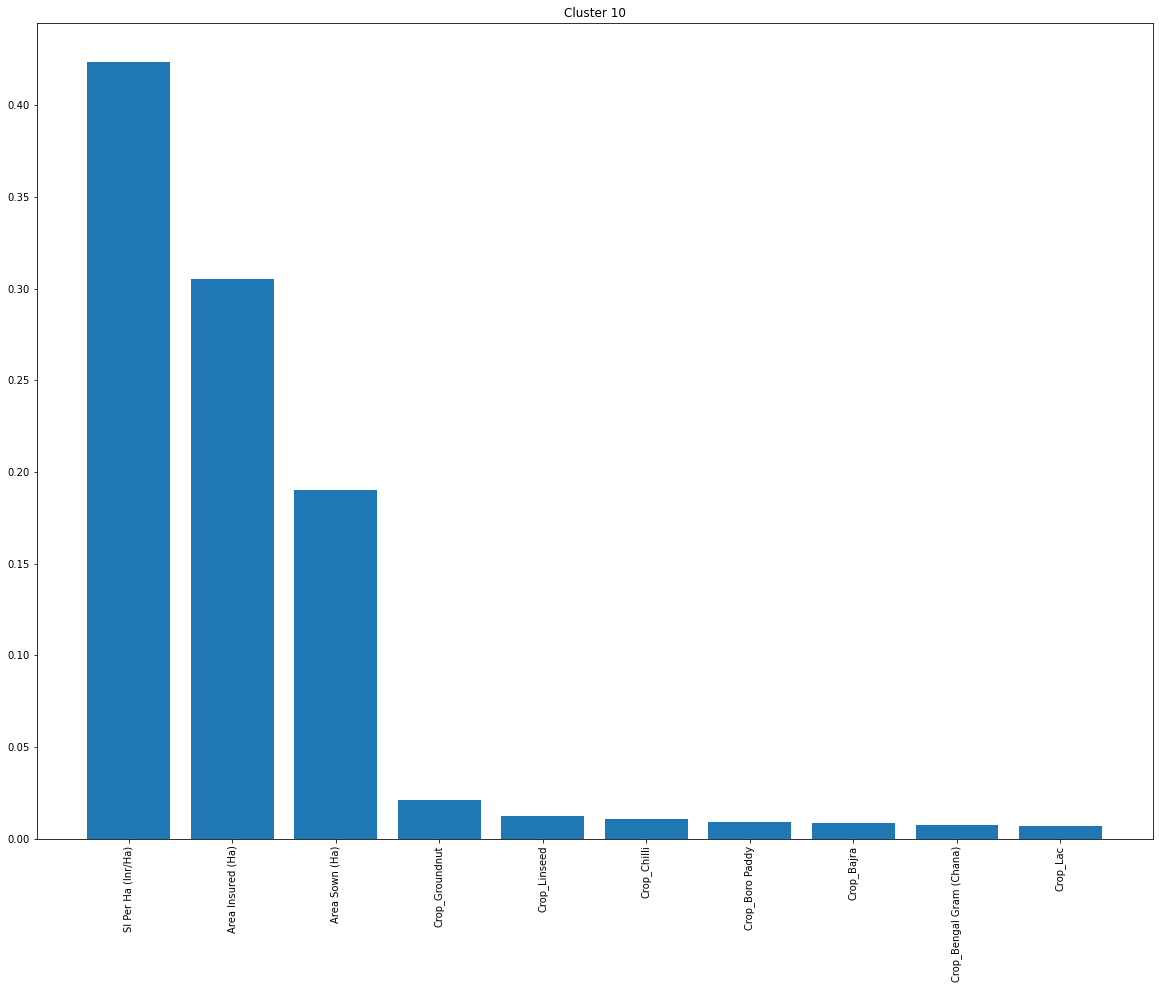

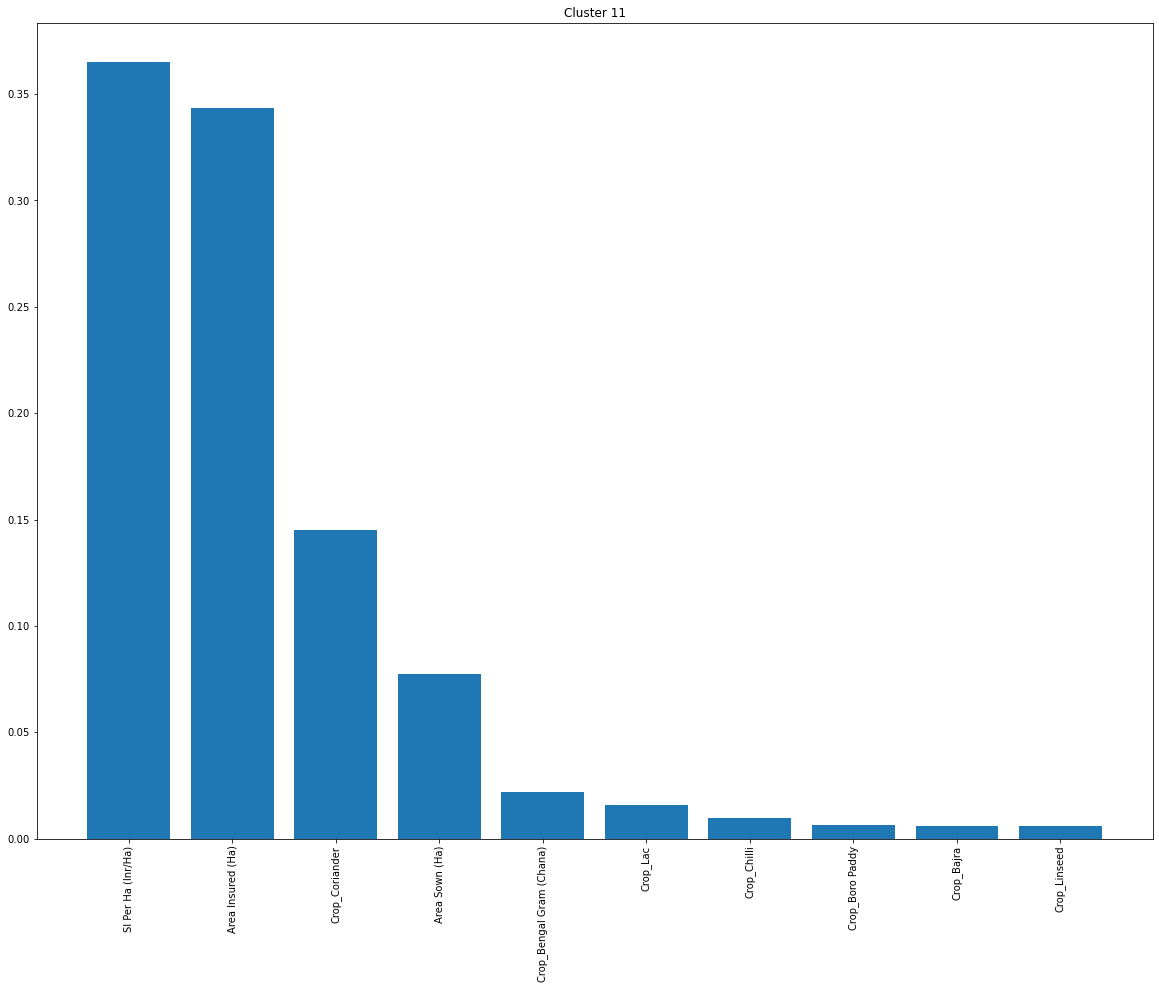

In [24]:
for i in range(k_opt_K):
    #importance and labels sorted decreasing
    imp = np.sort(list_forest_importances[i])[::-1]
    label_imp = X_R.columns[np.argsort(list_forest_importances[i])[::-1]]
    p = 10 # number of parameters to plot

    fig = plt.figure(figsize=(20,15))
    plt.bar(label_imp[:p],imp[:p])
    plt.xticks(rotation = 'vertical')
    plt.title("Cluster "+str(i))
    plt.show()